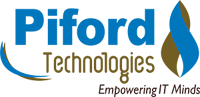

# Resnet50  : Residual Network on Custom Dataset

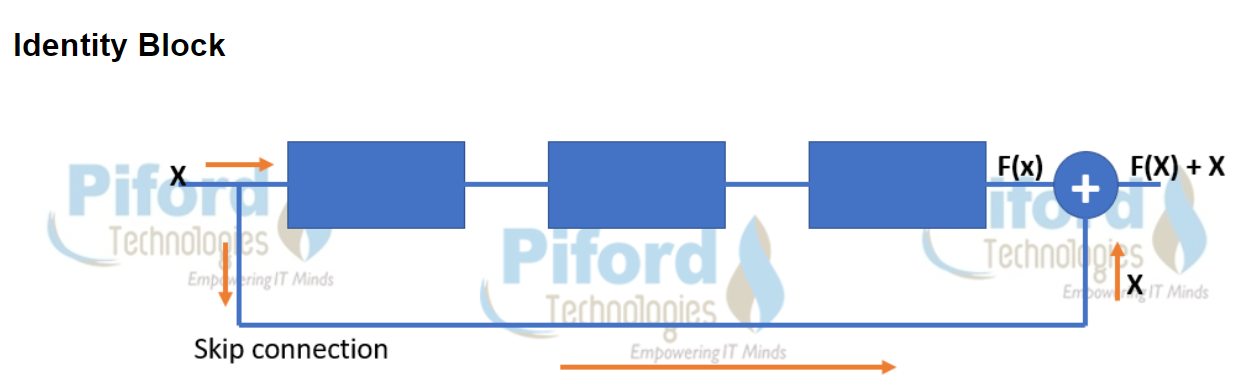

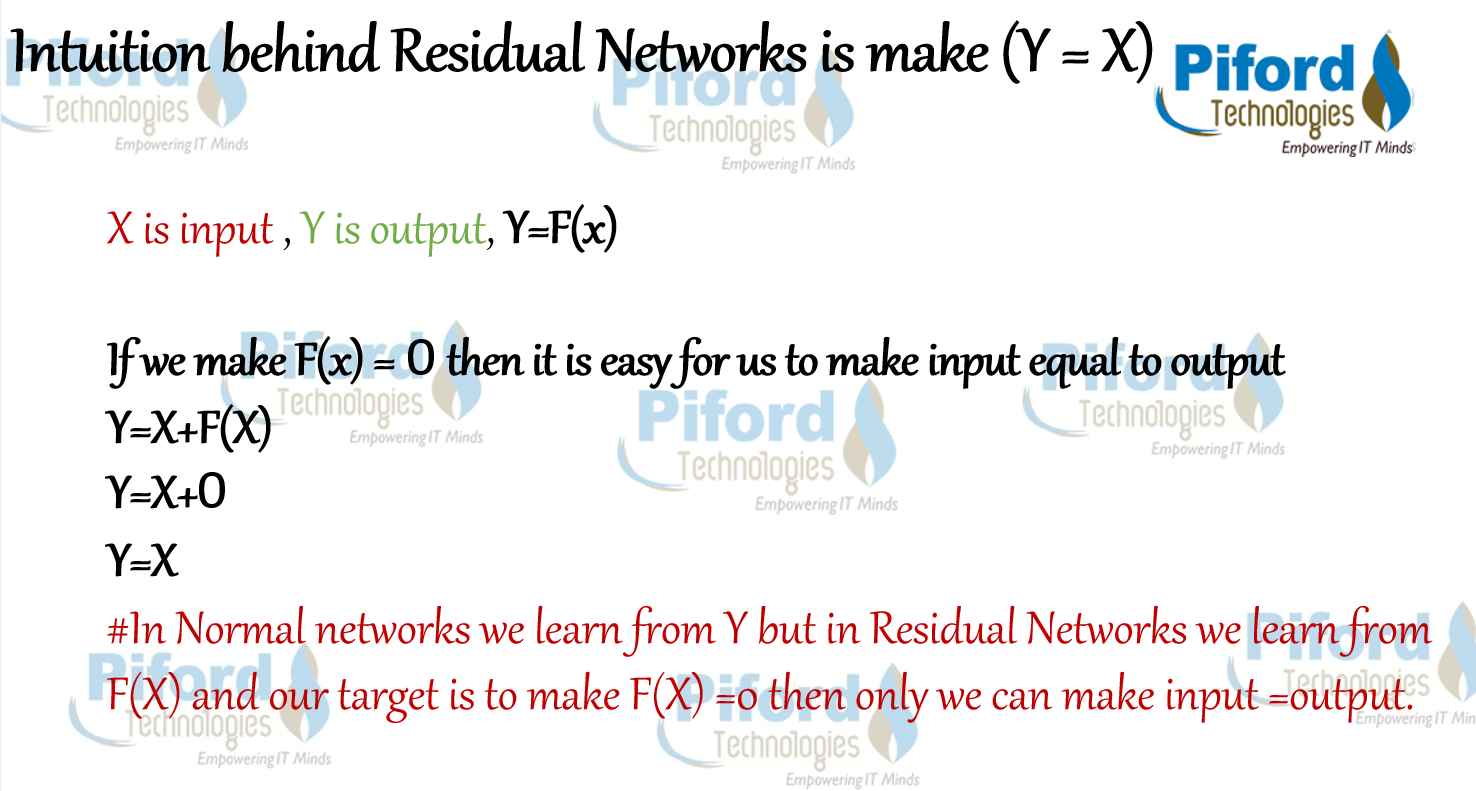

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('rooms_dataset')

room_types = os.listdir('rooms_dataset')
print (room_types)  #what kinds of rooms are in this dataset

print("Types of rooms found: ", len(room_types))


['bed_room', 'dining_room', 'living_room']
Types of rooms found:  3


In [53]:

rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('rooms_dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('rooms_dataset' + '/' +item) + '/' + room))
    #print(rooms[:1])

rooms

[('bed_room', 'rooms_dataset/bed_room/apartment-2094734__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/apartment-4744139__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/architecture-2141065__340.jpg'),
 ('bed_room',
  'rooms_dataset/bed_room/architecture-modern-house-beautiful-interiors-260nw-278631791.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/baby-1266117__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bath-753272__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-1048194__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-1232590__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-1303451__340 (1).jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-1303451__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-142516__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-1846251__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-1853443__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-1853907__340.jpg'),
 ('bed_room', 'rooms_dataset/bed_room/bed-186346__340.jpg'),

In [55]:
    
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
#print(rooms_df.tail())


  room type                                              image
0  bed_room  rooms_dataset/bed_room/apartment-2094734__340.jpg
1  bed_room  rooms_dataset/bed_room/apartment-4744139__340.jpg
2  bed_room  rooms_dataset/bed_room/architecture-2141065__3...
3  bed_room  rooms_dataset/bed_room/architecture-modern-hou...
4  bed_room       rooms_dataset/bed_room/baby-1266117__340.jpg


In [56]:

# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)



Total number of rooms in the dataset:  393
rooms in each category: 
bed_room       159
living_room    148
dining_room     86
Name: room type, dtype: int64


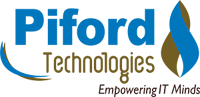

In [38]:

import cv2
path = 'rooms_dataset/'


im_size = 224

images = []
labels = []

for i in room_types:
    data_path = path + str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    filenames = [i for i in os.listdir(data_path) ]
   # print(filenames)  # will get the names of all images
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
labels    

['bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',
 'bed_room',

In [39]:
# Transform the image array to a numpy type
images = np.array(images)
images.shape   

(393, 224, 224, 3)

In [40]:
images = images.astype('float32') / 255.0

In [41]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=rooms_df['room type'].values
#print(y[:5])

# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
#print (y)

y=y.reshape(-1,1)
onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
Y= onehotencoder.fit_transform(y)
Y.shape  #(393, 3)

C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(393, 3)

In [42]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(373, 224, 224, 3)
(373, 3)
(20, 224, 224, 3)
(20, 3)


# Let's start with Resnet Algorithm using Keras

In [43]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

# Identity Block

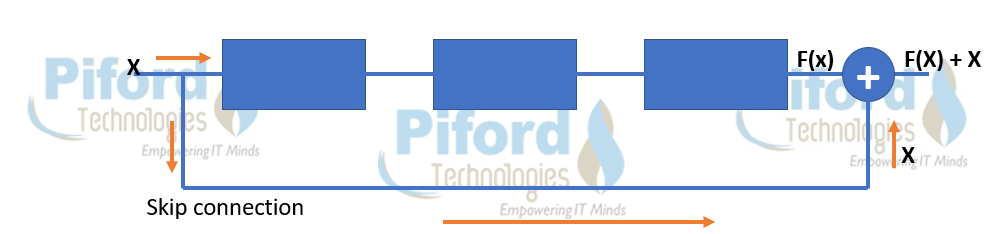

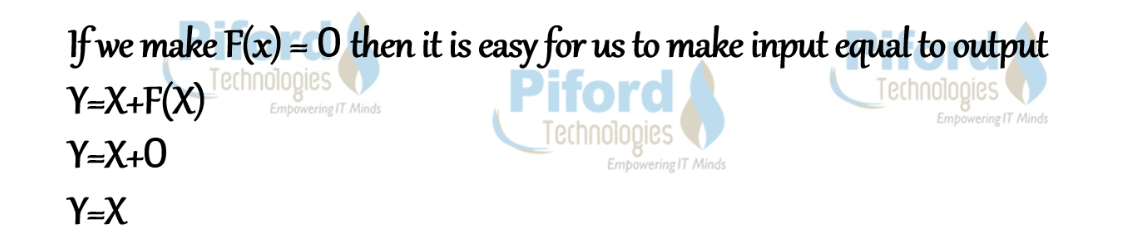

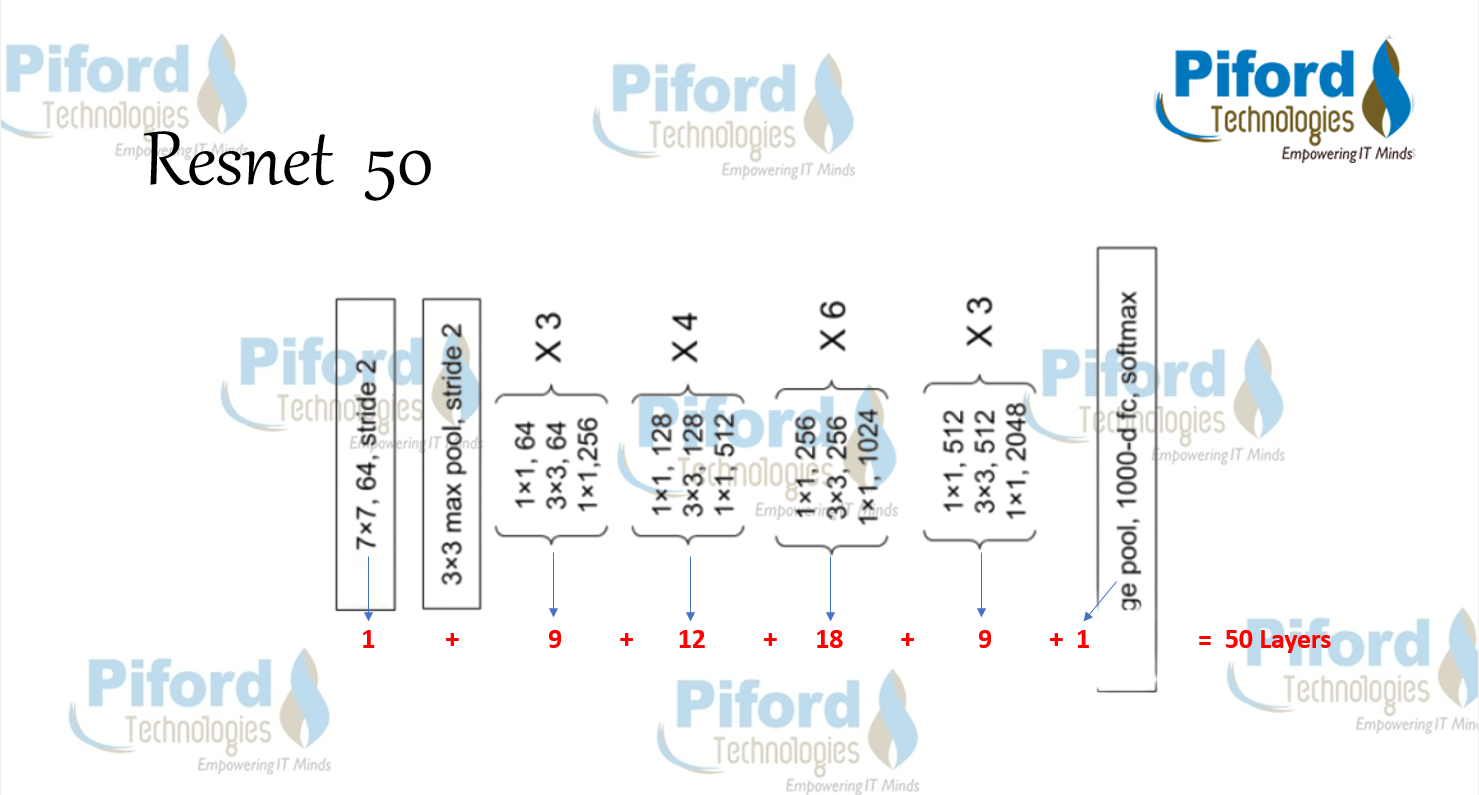

In [44]:

def identity_block(X, f, filters):

    # Retrieve Filters
    F1, F2, F3 = filters  # F1=64,F2=64,256
    
    X_shortcut = X
    
    # First  layer
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    
    # Second  layer
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    # Third  layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    # Final step: Add shortcut value to F(X), and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

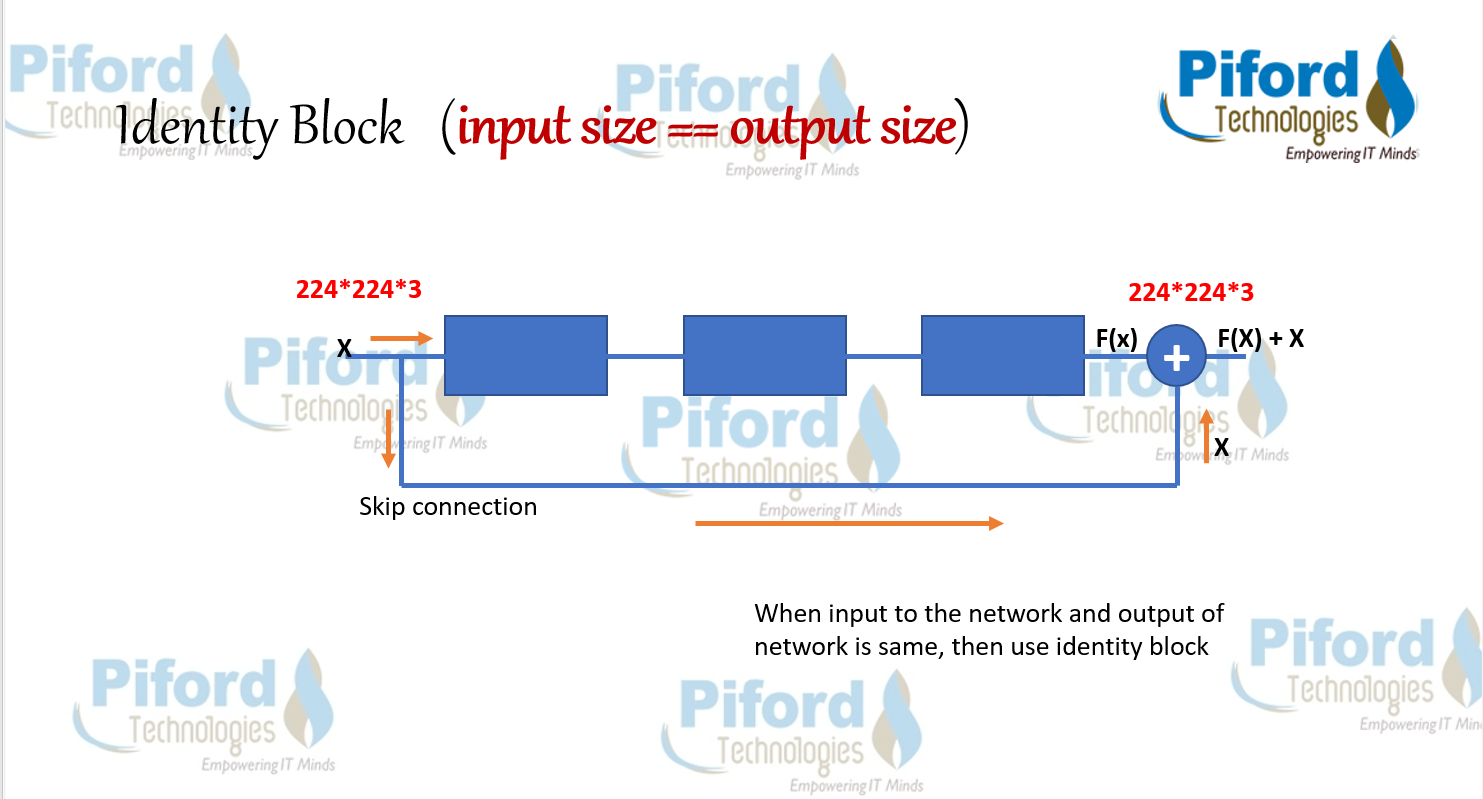

# Convolutional Block

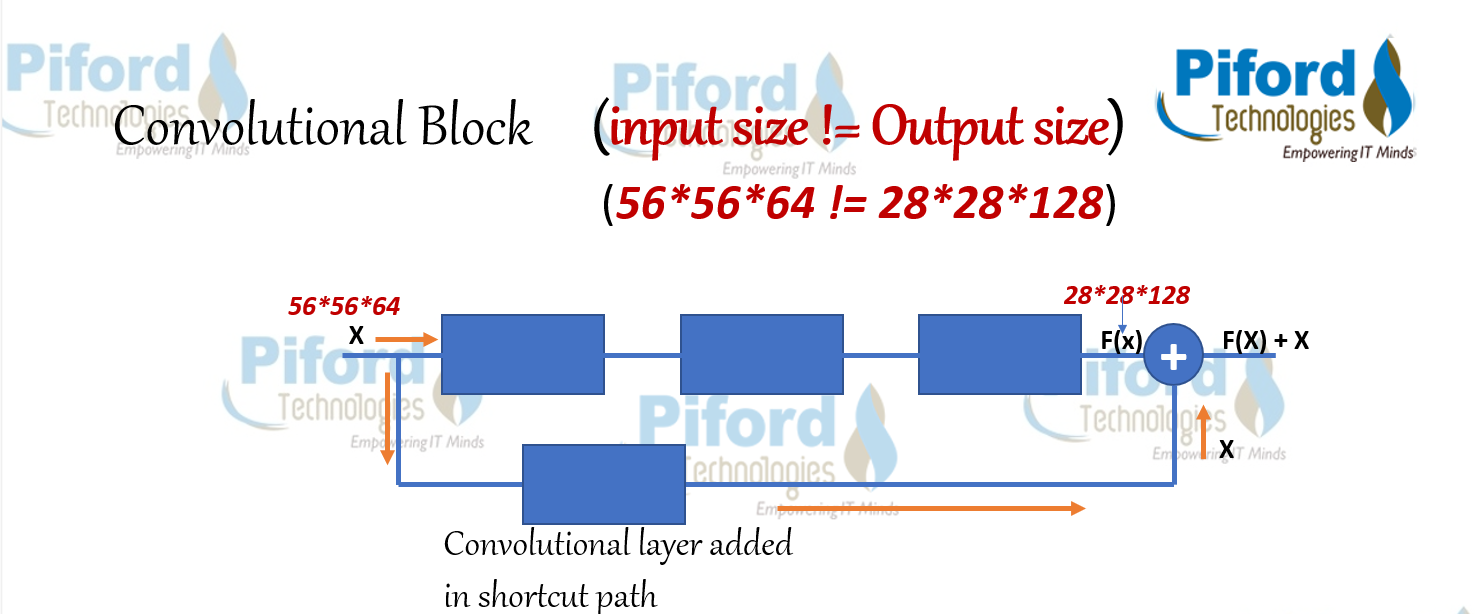

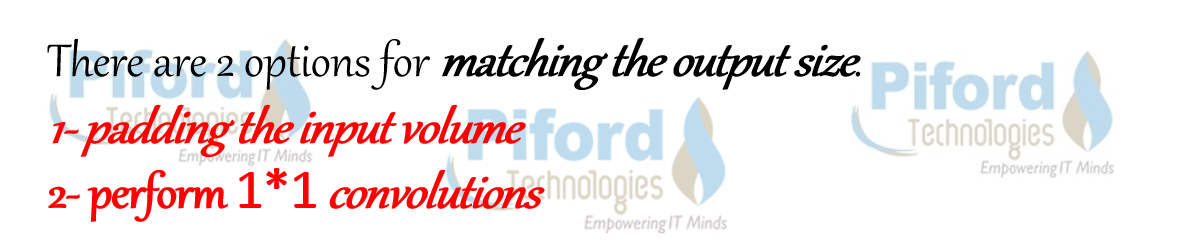

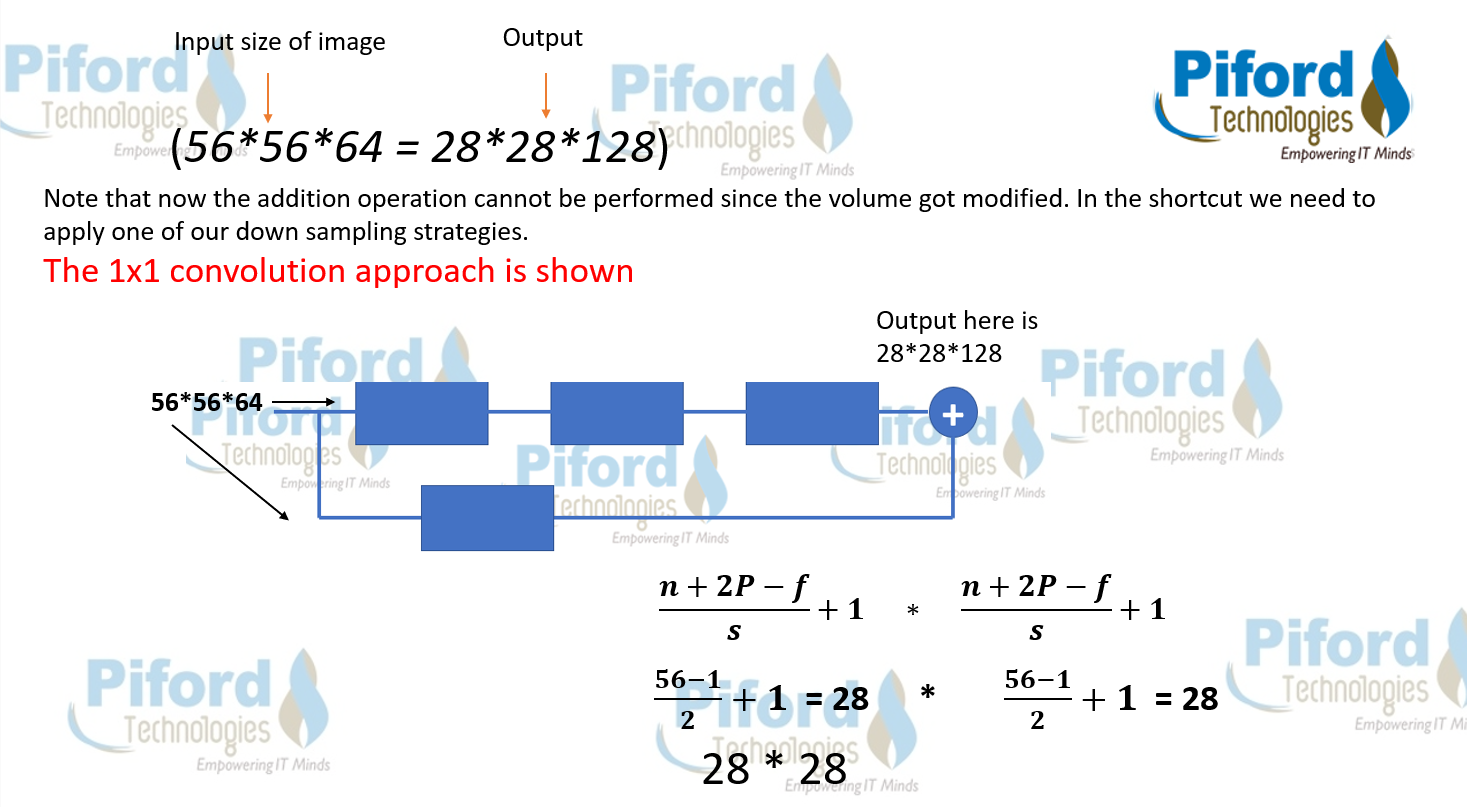

In [45]:

def convolutional_block(X, f, filters, s = 2):

    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s))(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3)(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X


# Creating ResNet 50 

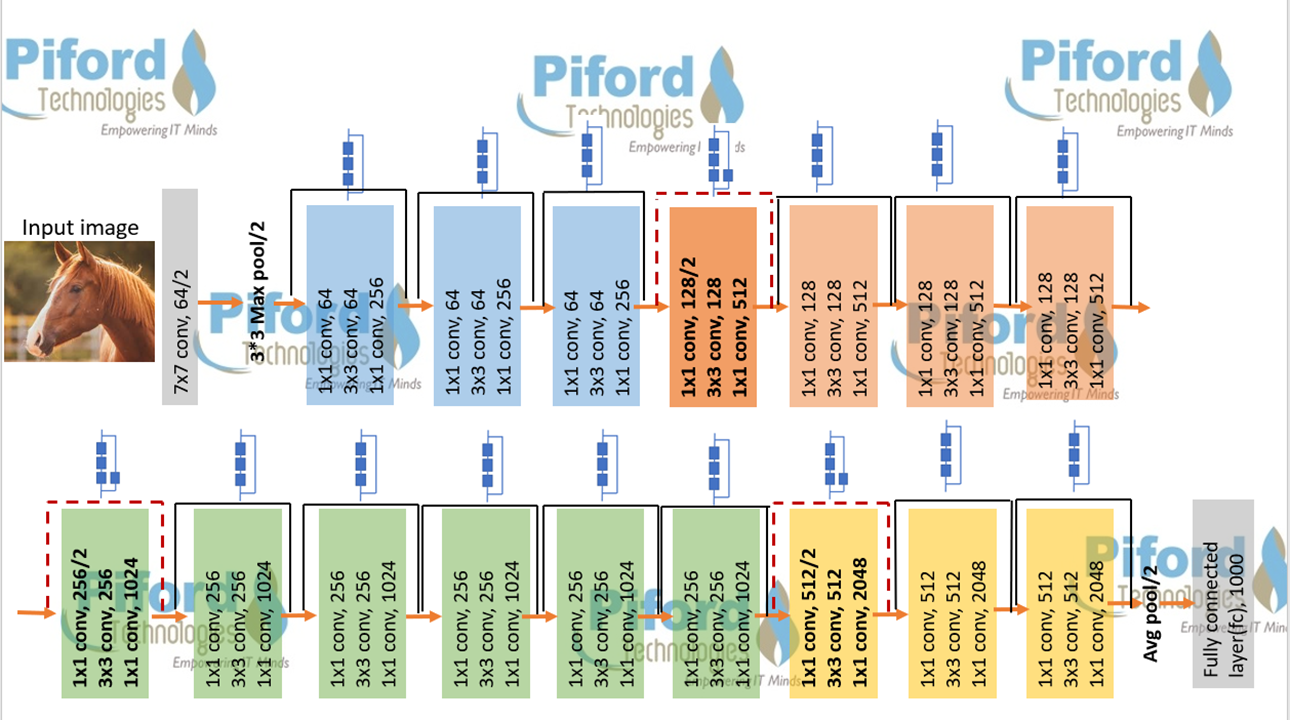

In [46]:

def ResNet50(input_shape=(224, 224, 3), classes=3):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2))(X) 
    X = BatchNormalization(axis=3)(X) 
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
   
    # below 3 lines are the conv layers from convolutional_block function defined above
    #X = Conv2D(F1, (1, 1), strides = (s,s))(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256]) 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
  
    X = identity_block(X, 3, [64, 64, 256])
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)


    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], s = 2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], s = 2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], s = 2)
    X = identity_block(X, 3, [512, 512, 2048])
    X = identity_block(X, 3, [512, 512, 2048])

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


In [47]:
model = ResNet50(input_shape = (224, 224, 3), classes = 3)

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_55 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
batch_normalization_55 (BatchNo (None, 112, 112, 64) 256         conv2d_55[0][0]                  
__________________________________________________________________________________________________
activation

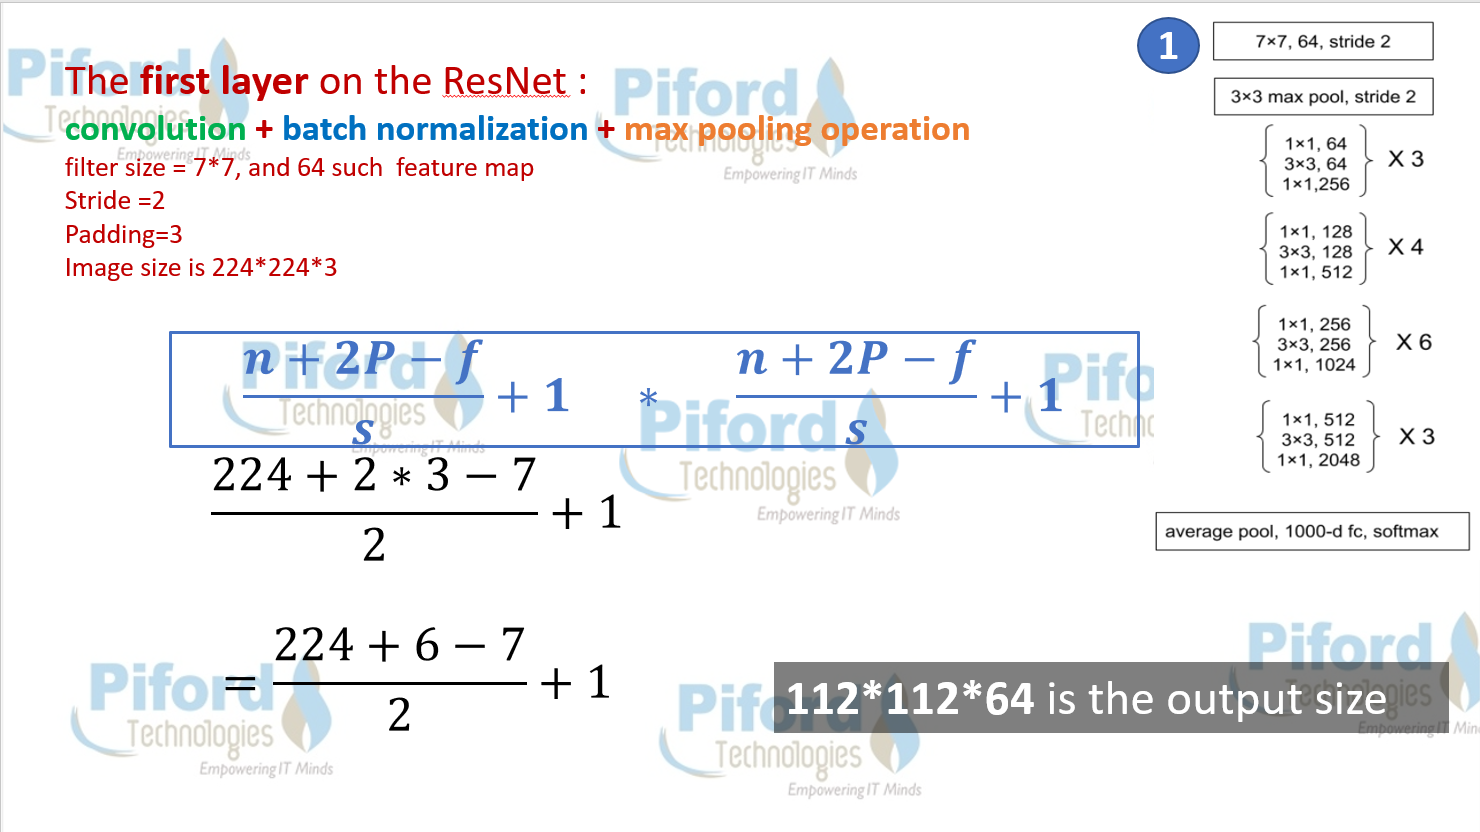

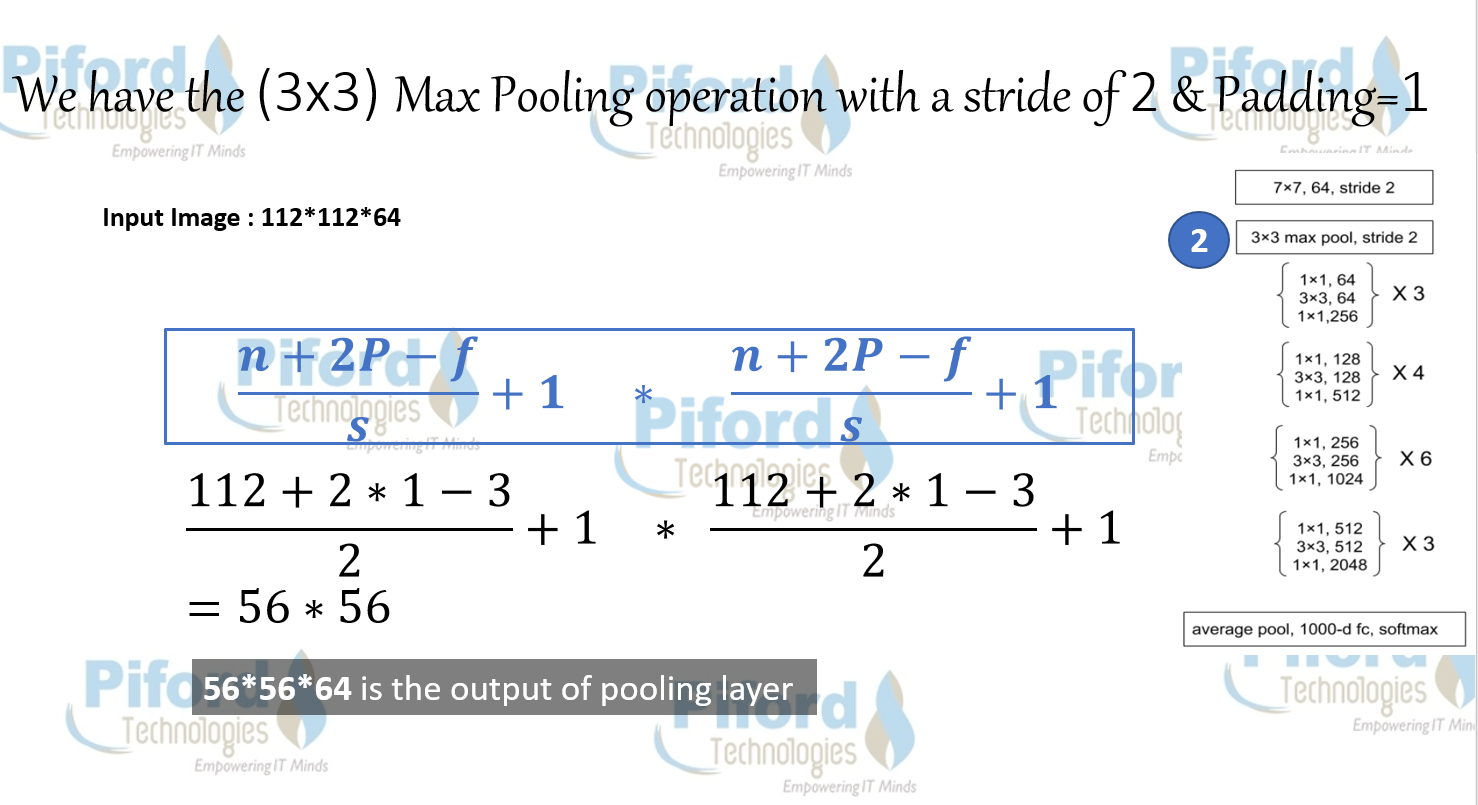

In [50]:
model.fit(train_x, train_y, epochs = 3, batch_size = 32) 

Epoch 1/3
373/373 [==============================] - 399s 1s/step - loss: 4.7888 - acc: 0.3646
Epoch 2/3
373/373 [==============================] - 418s 1s/step - loss: 2.5993 - acc: 0.3887
Epoch 3/3
373/373 [==============================] - 376s 1s/step - loss: 2.3192 - acc: 0.3834


In [51]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

20/20 [==============================] - 5s 240ms/step
Loss = 8.909331321716309
Test Accuracy = 0.44999998807907104


# Testing Model on Unseen Data

Input image shape: (1, 224, 224, 3)
[[0. 0. 1.]]


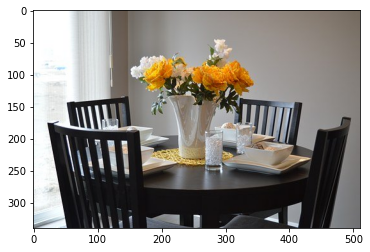

In [52]:
from matplotlib.pyplot import imread
img_path = 'test_room.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))

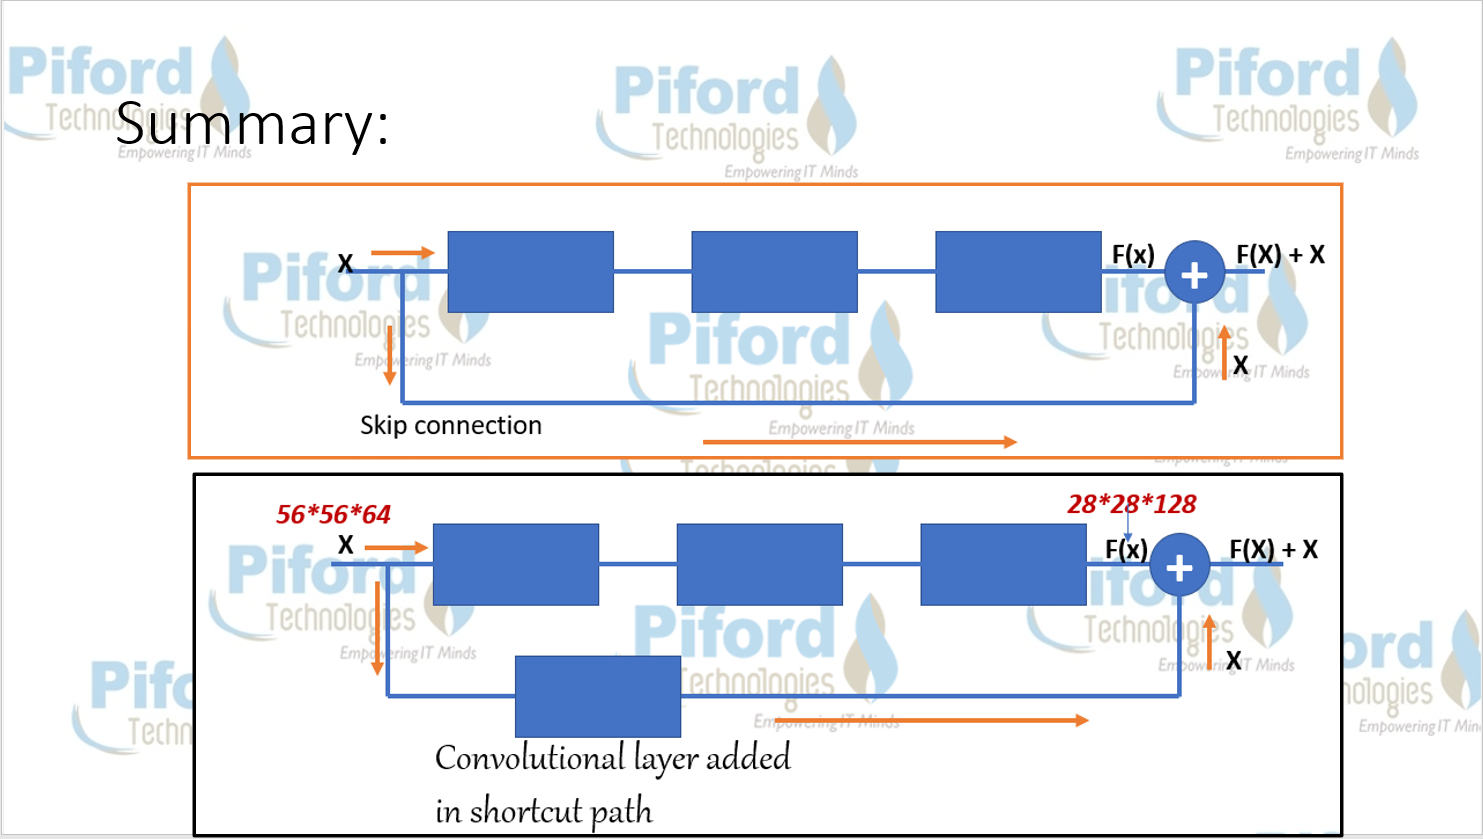

# Zero padding on Image

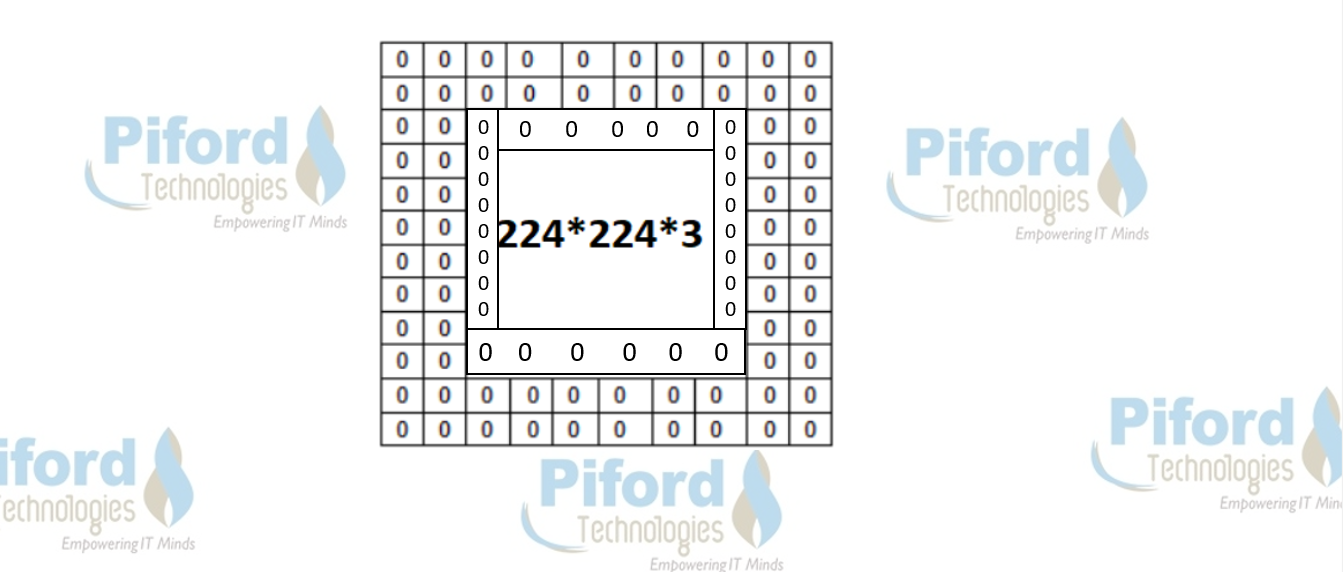

# 224+3+3 =230*230